## Importing Libraries

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Importing dataset from S3 bucket

In [52]:
import boto3
import pandas as pd
import os

# Create an S3 client
s3 = boto3.client('s3')

# Define the S3 bucket and file key
bucket_name = 'projectbigdata1243'
file_key = 'dataset.csv'

# Download the file from S3 to a temporary file
temp_file = '/tmp/temp.csv'
s3.download_file(bucket_name, file_key, temp_file)

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv(temp_file, dtype=str)

# Delete the temporary file
os.remove(temp_file)


## Displaying Columns

In [53]:
df.columns

Index(['basefloodelevation', 'basementenclosurecrawlspacetype', 'censustract',
       'construction', 'countycode', 'crsdiscount',
       'deductibleamountinbuildingcoverage',
       'deductibleamountincontentscoverage', 'elevatedbuildingindicator',
       'elevationdifference', 'federalpolicyfee', 'latitude', 'longitude',
       'numberoffloorsininsuredbuilding', 'occupancytype',
       'originalconstructiondate', 'originalnbdate', 'policycost',
       'policycount', 'policyeffectivedate', 'policyterminationdate',
       'policytermindicator', 'postfirmconstructionindicator',
       'primaryresidenceindicator', 'propertystate', 'reportedzipcode',
       'regularemergencyprogramindicator', 'reportedcity',
       'totalbuildinginsurancecoverage', 'totalcontentsinsurancecoverage',
       'totalinsurancepremiumofthepolicy'],
      dtype='object')

## Displaying Null Values

In [55]:
df.isnull().sum()

basefloodelevation                    39713
basementenclosurecrawlspacetype           0
censustract                             338
construction                              0
countycode                               20
crsdiscount                               0
deductibleamountinbuildingcoverage     1089
deductibleamountincontentscoverage     6153
elevatedbuildingindicator                 0
elevationdifference                       0
federalpolicyfee                          0
latitude                                 47
longitude                                47
numberoffloorsininsuredbuilding          96
occupancytype                             0
originalconstructiondate                154
originalnbdate                            0
policycost                                0
policycount                               0
policyeffectivedate                       0
policyterminationdate                     0
policytermindicator                       0
postfirmconstructionindicator   

## deleting unwanted columns

In [56]:
df = df.drop(['propertystate', 'regularemergencyprogramindicator','regularemergencyprogramindicator','originalnbdate', 'originalnbdate','policyterminationdate','policyeffectivedate','originalconstructiondate'], axis=1)


## Heatmap for Null Values

<AxesSubplot: >

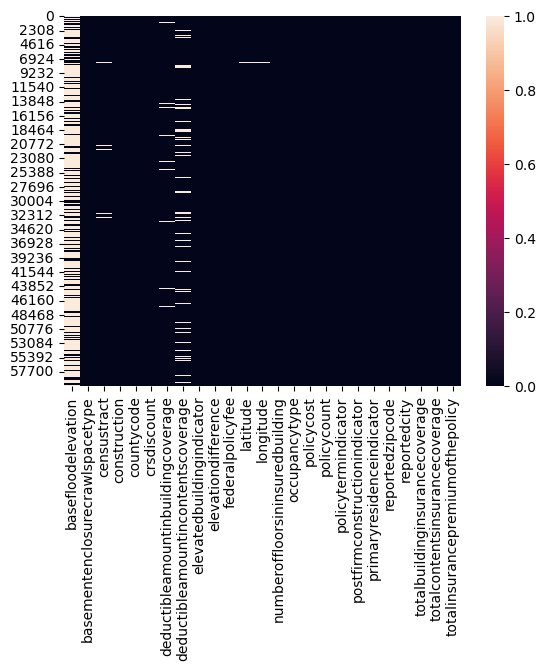

In [57]:
sns.heatmap(df.isnull())

## Mode Imputation

In [58]:
df = df.fillna(df.mode()) # fill the missing values in a column with the column's mode value
df

,basefloodelevation,basementenclosurecrawlspacetype,censustract,construction,countycode,crsdiscount,deductibleamountinbuildingcoverage,deductibleamountincontentscoverage,elevatedbuildingindicator,elevationdifference,...,policycost,policycount,policytermindicator,postfirmconstructionindicator,primaryresidenceindicator,reportedzipcode,reportedcity,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,totalinsurancepremiumofthepolicy
0,8,2,33013038500,N,33013,0,0,0,N,999,...,388,1,1,N,Y,3278,WARNER,250000,100000,375
1,NaN,0,22063040700,N,22063,0.05,1,1,N,999,...,315,1,1,N,Y,70726,DENHAM SPRINGS,16400,8800,280
2,NaN,0,45051060204,N,45051,0,0,0,N,999,...,348,1,1,Y,Y,29579,MYRTLE BEACH,250000,100000,335
3,519,2,1055001200,N,1055,0,1,1,Y,-2,...,951,1,1,Y,Y,35901,GADSDEN,174900,21000,916
4,7,0,12086000115,N,12086,0,0,0,N,0,...,1323,1,1,N,Y,33160,GOLDEN BEACH,250000,100000,1288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59994,8,0,12109021404,N,12109,0.2,4,2,N,0,...,646,1,1,Y,Y,32080,ST AUGUSTINE,123000,11000,611
59995,NaN,0,22055001403,N,22055,0,0,0,N,999,...,348,1,1,Y,Y,70508,LAFAYETTE,250000,100000,335
59996,11,0,12103025012,N,12103,0.1,0,0,N,1,...,553,1,1,Y,Y,33777,LARGO,250000,100000,518
59997,NaN,0,12101031203,N,12101,0,0,0,N,999,...,326,1,1,Y,Y,34667,HUDSON,200000,80000,313


## After Mode Imputation also we have Null Values

In [59]:
df.isnull().sum()

basefloodelevation                    39712
basementenclosurecrawlspacetype           0
censustract                             338
construction                              0
countycode                               20
crsdiscount                               0
deductibleamountinbuildingcoverage     1089
deductibleamountincontentscoverage     6153
elevatedbuildingindicator                 0
elevationdifference                       0
federalpolicyfee                          0
latitude                                 47
longitude                                47
numberoffloorsininsuredbuilding          96
occupancytype                             0
policycost                                0
policycount                               0
policytermindicator                       0
postfirmconstructionindicator           154
primaryresidenceindicator                 0
reportedzipcode                           0
reportedcity                              0
totalbuildinginsurancecoverage  

## Filling Null Values with Zero

In [60]:
df = df.fillna(0) # fill the missing values in a column with the column's mean value
df

,basefloodelevation,basementenclosurecrawlspacetype,censustract,construction,countycode,crsdiscount,deductibleamountinbuildingcoverage,deductibleamountincontentscoverage,elevatedbuildingindicator,elevationdifference,...,policycost,policycount,policytermindicator,postfirmconstructionindicator,primaryresidenceindicator,reportedzipcode,reportedcity,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,totalinsurancepremiumofthepolicy
0,8,2,33013038500,N,33013,0,0,0,N,999,...,388,1,1,N,Y,3278,WARNER,250000,100000,375
1,0,0,22063040700,N,22063,0.05,1,1,N,999,...,315,1,1,N,Y,70726,DENHAM SPRINGS,16400,8800,280
2,0,0,45051060204,N,45051,0,0,0,N,999,...,348,1,1,Y,Y,29579,MYRTLE BEACH,250000,100000,335
3,519,2,1055001200,N,1055,0,1,1,Y,-2,...,951,1,1,Y,Y,35901,GADSDEN,174900,21000,916
4,7,0,12086000115,N,12086,0,0,0,N,0,...,1323,1,1,N,Y,33160,GOLDEN BEACH,250000,100000,1288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59994,8,0,12109021404,N,12109,0.2,4,2,N,0,...,646,1,1,Y,Y,32080,ST AUGUSTINE,123000,11000,611
59995,0,0,22055001403,N,22055,0,0,0,N,999,...,348,1,1,Y,Y,70508,LAFAYETTE,250000,100000,335
59996,11,0,12103025012,N,12103,0.1,0,0,N,1,...,553,1,1,Y,Y,33777,LARGO,250000,100000,518
59997,0,0,12101031203,N,12101,0,0,0,N,999,...,326,1,1,Y,Y,34667,HUDSON,200000,80000,313


In [61]:
df.isnull().sum()

basefloodelevation                    0
basementenclosurecrawlspacetype       0
censustract                           0
construction                          0
countycode                            0
crsdiscount                           0
deductibleamountinbuildingcoverage    0
deductibleamountincontentscoverage    0
elevatedbuildingindicator             0
elevationdifference                   0
federalpolicyfee                      0
latitude                              0
longitude                             0
numberoffloorsininsuredbuilding       0
occupancytype                         0
policycost                            0
policycount                           0
policytermindicator                   0
postfirmconstructionindicator         0
primaryresidenceindicator             0
reportedzipcode                       0
reportedcity                          0
totalbuildinginsurancecoverage        0
totalcontentsinsurancecoverage        0
totalinsurancepremiumofthepolicy      0


<AxesSubplot: >

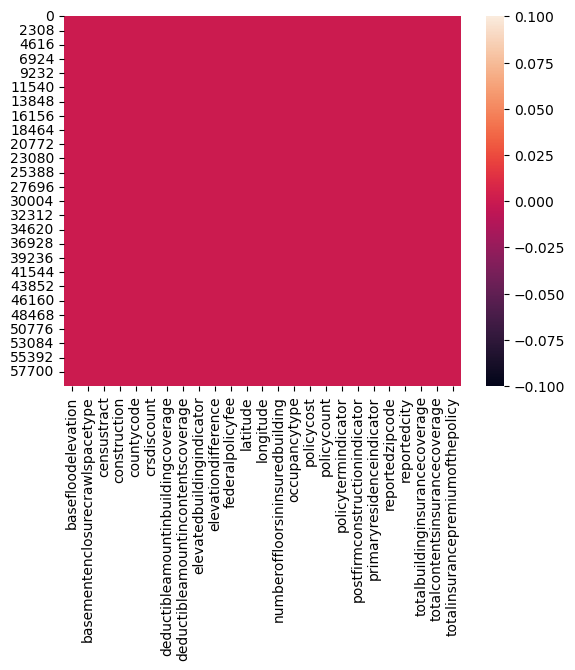

In [63]:
sns.heatmap(df.isnull())

## Checking for duplicate Values

In [65]:
df.duplicated()


0        False
1        False
2        False
3        False
4        False
         ...  
59994    False
59995     True
59996    False
59997    False
59998    False
Length: 59999, dtype: bool

## Converting Object datatypes to Int

In [66]:
df['totalcontentsinsurancecoverage'] = df['totalcontentsinsurancecoverage'].astype(int)


In [67]:
df['totalbuildinginsurancecoverage'] = df['totalbuildinginsurancecoverage'].astype(int)


## Scatter Plot

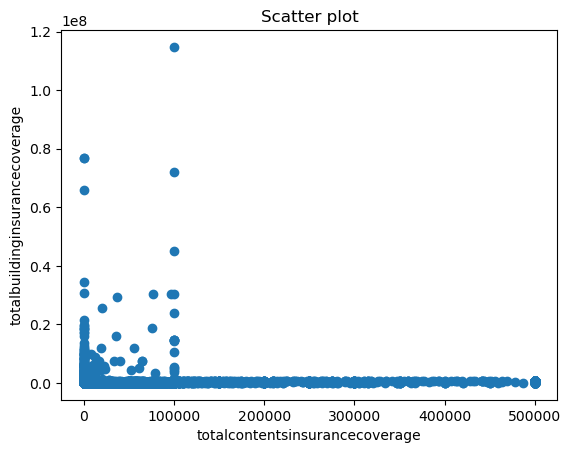

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = df['totalcontentsinsurancecoverage']
y = df['totalbuildinginsurancecoverage']

# Create the scatter plot
fig, ax = plt.subplots()
ax.scatter(x, y)

# Add labels and title
ax.set_xlabel('totalcontentsinsurancecoverage')
ax.set_ylabel('totalbuildinginsurancecoverage')
ax.set_title('Scatter plot')

# Show the plot
plt.show()


## Histogram

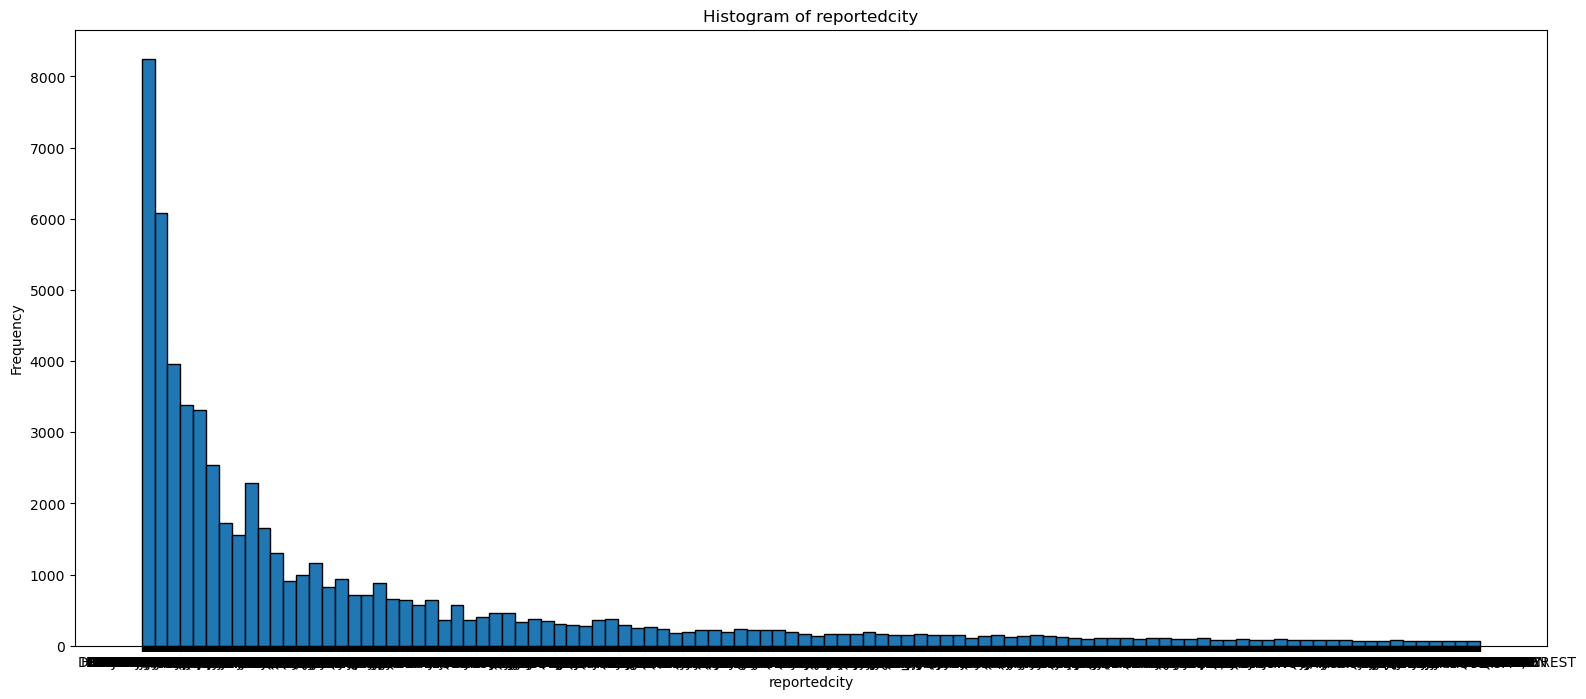

In [69]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(19,8))

# Create the histogram
ax.hist(df['reportedcity'], bins='auto', edgecolor='black')
ax.set_xlabel('reportedcity')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of reportedcity')

# Show the plot
plt.show()


## Box Plot

In [70]:
import pandas as pd
import plotly.express as px


# Choose the column for the box plot
column = 'totalinsurancepremiumofthepolicy'

# Create the box plot
fig = px.box(df, y=column, title='Box Plot of Total Insurance Premium of the Policy')

# Update the axes labels
fig.update_xaxes(title_text='')
fig.update_yaxes(title_text='Total Insurance Premium of the Policy')

# Show the plot
fig.show()

## Pie Chart

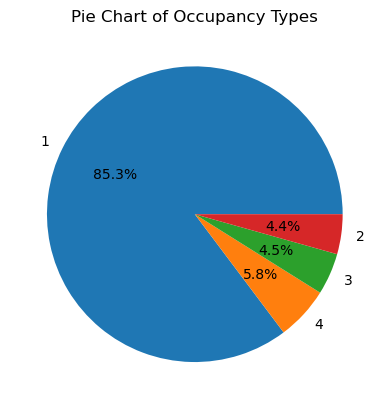

In [71]:
import matplotlib.pyplot as plt

# Choose the column for the pie chart
column = 'occupancytype'

# Remove rows with None or NaN values in the chosen column
df = df.dropna(subset=[column])

# Get the counts for each unique occupancy type
counts = df[column].value_counts()

# Create the pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of Occupancy Types')

# Show the plot
plt.show()

# Label Encoding

In [72]:
df['construction'] = df['construction'].map({'Y': 1, 'N': 0})
df['elevatedbuildingindicator'] = df['elevatedbuildingindicator'].map({'Y': 1, 'N': 0})
df['postfirmconstructionindicator'] = df['postfirmconstructionindicator'].map({'Y': 1, 'N': 0})
df['primaryresidenceindicator'] = df['primaryresidenceindicator'].map({'Y': 1, 'N': 0})


# DecisionTree

In [85]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# convert the remaining columns to integers

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('totalinsurancepremiumofthepolicy', axis=1), 
                                                    df['totalinsurancepremiumofthepolicy'], 
                                                    test_size=0.2, 
                                                    random_state=42)

# create the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# train the classifier on the training set
clf.fit(X_train, y_train)

# make predictions on the testing set
y_pred = clf.predict(X_test)

# calculate the accuracy of the classifier
dt_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {dt_accuracy}")


Accuracy: 0.84925


# KNeighborsClassifier

In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model with KNN algorithm
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the test set and calculate accuracy
y_pred = knn.predict(X_test)
knn_accuracy = knn.score(X_test, y_test)

print(f"Accuracy: {knn_accuracy}")


Accuracy: 0.31683333333333336


# Finding Optimum k value

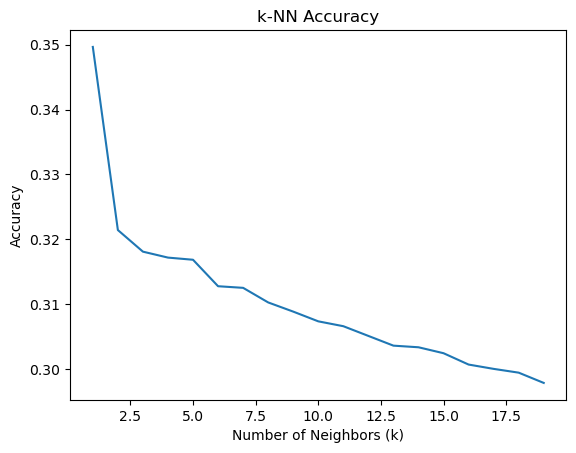

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Range of k values to test
k_values = range(1, 20)

# List to store accuracy scores for each value of k
accuracy_scores = []

# Loop over different k values
for k in k_values:
    # Train k-NN classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Make predictions on test set
    y_pred = knn.predict(X_test)
    
    # Compute accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store accuracy score
    accuracy_scores.append(accuracy)

# Plot accuracy scores vs k values
plt.plot(k_values, accuracy_scores)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('k-NN Accuracy')
plt.show()

# Naive Bayes

In [88]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Create a Naive Bayes Classifier
nb = GaussianNB()

# Train the model using the training data
nb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = nb.predict(X_test)

# Evaluate the model's accuracy
nb_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", nb_accuracy)


Accuracy: 0.4745


# LinearRegression

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create linear regression object
regressor = LinearRegression()

# Train the model using the training sets
regressor.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regressor.predict(X_test)

# Calculate the R-squared value
lr_accuracy = r2_score(y_test, y_pred)

print("Accuracy:", lr_accuracy)


Accuracy: 0.9999386327177588


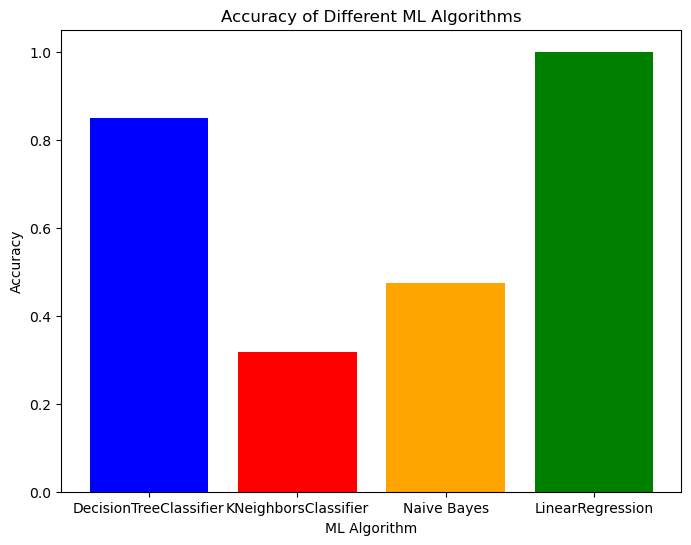

In [84]:
import matplotlib.pyplot as plt

# Define accuracies for different ML algorithms
accuracies = [dt_accuracy, knn_accuracy, nb_accuracy, lr_accuracy]

# Define names of ML algorithms
names = ['DecisionTreeClassifier', 'KNeighborsClassifier', 'Naive Bayes', 'LinearRegression']

colors = ['blue', 'red', 'orange', 'green']

# Create bar plot with larger figure size
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(names, accuracies,color=colors)

# Add labels and title
ax.set_xlabel('ML Algorithm')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of Different ML Algorithms')

# Show the plot
plt.show()
